---
title: Explore Solvable and Unsolvable Equations with SymPy
---

In [5]:
# Optional: Uncomment this if running interactively
# %pip install numpy matplotlib sympy==1.13.3

## Introduction

> Why can we solve some equations easily, while others seem impossible? And another thing: why is this knowledge hidden from us?

As scientists and engineers, we often create mathematical models. For example, consider the model: $y = x^2$. Given a value for $x$, we can apply it forward to compute $y$. For instance, if $x = 3$, then $y = 9$.

We can also apply this model backward. Starting with $y = x^2$, we rearrange to solve for $x$: $x = \pm\sqrt{y}$. If $y = 9$, then $x = \pm 3$. The expression $x = \pm \sqrt{y}$ is an example of a **closed-form solution** — an expression that uses a finite combination of standard operations and functions.

However, not all models are so straightforward. Sometimes, we encounter equations where we can’t simply “solve for $x$” and get a closed-form expression. In such cases, we might hear, “That’s not solvable — you need numerical methods.” Numerical methods are powerful. They can provide precise approximations. Still, it frustrates me (and perhaps you) that no one ever seems to explain when closed-form solutions are possible and when they aren’t.

The great Johannes Kepler shared our frustration. When studying planetary motion, he created this model:

$$
y = x - c \sin(x)
$$

This equation converts a body’s position along its orbit ($x$) into its time along the orbit ($y$). Kepler sought a closed-form solution for $x$ to turn time into a position. However, even 400 years later, the best we have are numerical methods.

In this article, we’ll build *intuition* about when to expect a closed-form solution.

> **Rigorous alternative to intuition.** The boundary between solvable and unsolvable equations is studied in advanced fields of mathematics. **Galois theory** shows, for example, why the *general* fifth-degree polynomial has no formula in radicals (the Abel–Ruffini theorem). **Transcendental number theory** helps explain why equations mixing algebraic and transcendental functions (like $x = e^x$) rarely yield elementary solutions. **Algebraic geometry** provides even broader tools for reasoning about solvability in higher dimensions. These areas are technically demanding and are not typically part of applied science training — which is exactly why they feel so opaque in practice. For readers curious to explore, the Wikipedia articles on [Galois theory](https://en.wikipedia.org/wiki/Galois_theory), [Abel–Ruffini theorem](https://en.wikipedia.org/wiki/Abel%E2%80%93Ruffini_theorem), [transcendental number theory](https://en.wikipedia.org/wiki/Transcendental_number_theory), and  [Lambert \(W\) function](https://en.wikipedia.org/wiki/Lambert_W_function) give approachable entry points and references to deeper mathematics.

Instead of diving into these advanced fields, we’ll cheat. Using **SymPy**, a Python-based computer algebra system, we’ll explore different classes of equations to see which it can solve with a closed-form expression. For completeness, we’ll also apply numerical methods.

We’ll explore equations that combine polynomials, exponentials, logarithms, and trigonometric functions. Along the way, we’ll discover specific combinations that often resist closed-form solutions. We’ll see that if you want to create an equation **with** (or **without**) a closed-form solution, you should **avoid** (or **try**) the following:

- Fifth degree and higher polynomials  
- Mixing $x$ with $\exp(x)$ or $\log(x)$ — if Lambert’s $W$ function is off-limits  
- Combining $\exp(x)$ and $\log(x)$ within the same equation  
- Some pairs of trigonometric functions with commensurate frequencies  
- Many pairs of trigonometric functions with non-commensurate frequencies  
- Mixing trigonometric functions with $x$, $\exp(x)$, or $\log(x)$  

> *Aside 1:* I’m not a mathematician, and my SymPy scripts are not higher mathematics. If you find any mistakes or overlooked resources, forgive my oversight. Please share them with me, and I’ll gladly add a note.

> *Aside 2:* [Welch Lab’s recent video, *Kepler’s Impossible Equation*](https://www.youtube.com/watch?v=hBkmyJ3TE0g), reminded me of my frustration about not knowing when an equation can be solved in a closed form. The video sparked the investigation that follows and provides our first example.

> *Aside 3:* **Limitations:** The equations I explore here were chosen for their instructive qualities, not from any systematic distribution. There isn’t really a “natural” way to sample equations at random, so these examples should be seen as exploratory case studies. The patterns I point out are illustrative, not statistical.

## Kepler’s Equation

Imagine you are Johannes Kepler’s research programmer. He has created the following model of orbital motion:

$$
y = x - c \sin(x)
$$

where:

- $x$ is the body’s position along its orbit. We measure this position as an angle (in radians). The angle starts at $0$ radians when the body is closest to the Sun. When the body has covered $\frac{1}{4}$ of its orbit’s distance, the angle is $\pi/2$ radians ($90^\circ$). When it has covered half of its orbit’s distance, the angle is $\pi$ ($180^\circ$), and so on. Recall that radians measure angles from $0$ to $2\pi$ rather than from $0$ to $360^\circ$.

- $c$ is the orbit’s eccentricity, ranging from $0$ (a perfect circle) to just under $1$ (a highly elongated ellipse). Suppose Kepler has observed a comet with $c = 0.967$.

- $y$ is the body’s time along its orbit. We measure this time as an angle (in radians). For instance, if the comet has an orbital period of 76 Earth years, then $\pi/2$ ($90^\circ$) corresponds to $\frac{1}{4}$ of 76 years, or 19 years. A time of $\pi$ ($180^\circ$) corresponds to $\frac{1}{2}$ of 76 years, or 38 years. A time of $2\pi$ ($360^\circ$) is the full 76-year orbital period.

This diagram shows the comet’s position at $\pi/2$ radians ($90^\circ$), which is $\frac{1}{4}$ of the way along its orbit:

![Comet's position at $\pi/2$ radians](figure1.png)


Kepler asks for the time when the comet reaches position $\pi/2$ radians ($90^\circ$). You create this Python code and look at the output:

In [1]:
import numpy as np

def kepler_equation(x):
    return x - c * np.sin(x)

c = 0.967
position_radians = np.pi / 2  # aka 90 degrees
time_radians = kepler_equation(position_radians)
orbital_period_earth_years = 76

t_earth_years = (time_radians / (2 * np.pi)) * orbital_period_earth_years
print(f"It takes approximately {t_earth_years:.2f} Earth years for the comet to move from 0 to π/2 radians.")

It takes approximately 7.30 Earth years for the comet to move from 0 to π/2 radians.


> *Aside:* The comet covers 25% of its orbit distance in under 10% of its orbital period because it speeds up when closer to the Sun.

No good deed goes unpunished. Kepler, fascinated by the result, assigns you a new task:  “Can you tell me how far along its orbit the comet is after 20 Earth years? I want to know the position in radians.”

“No problem,” you think. “I’ll just use a bit of high school algebra.”

First, you convert 20 Earth years into radians:

$$
\text{time\_radians} = \left(\frac{20}{76}\right) \cdot 2\pi = \frac{10}{19} \pi
$$

Next, you rearrange Kepler’s equation, setting it equal to zero:

$$
x - 0.967 \sin(x) - \frac{10}{19} \pi = 0
$$

Now you want to find the value of $x$ that makes this equation true. You decide to graph the equation to see where it crosses zero:

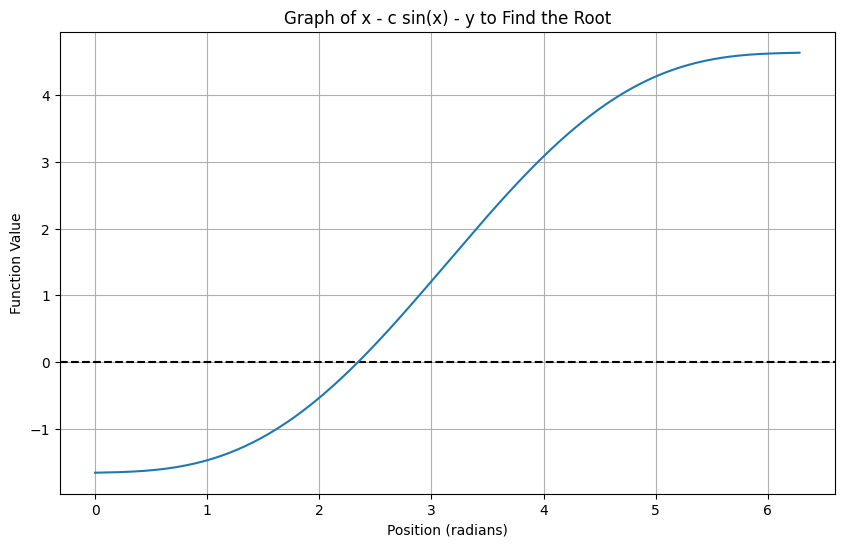

In [2]:
import numpy as np
import matplotlib.pyplot as plt

c = 0.967
time_earth_years = 20
orbital_period_earth_years = 76
time_radians = (time_earth_years / orbital_period_earth_years) * 2 * np.pi

def function_to_plot(x):
    return x - c * np.sin(x) - time_radians

x_vals = np.linspace(0, 2 * np.pi, 1000)
function_values = function_to_plot(x_vals)
plt.figure(figsize=(10, 6))
plt.axhline(0, color='black', linestyle='--')  # dashed horizontal line at y=0
plt.xlabel("Position (radians)")
plt.ylabel("Function Value")
plt.title("Graph of x - c sin(x) - y to Find the Root")
plt.grid(True)

plt.plot(x_vals, function_values)
plt.show()

So far, so good. The graph shows that a solution for $x$ exists. But when you try to rearrange the equation to solve for $x$ using algebra, you hit a wall.
How do you isolate $x$ when you have a combination of $x$ and $\sin(x)$?

“That’s okay,” you think. “We’ve got Python, and Python has the [SymPy package](https://www.sympy.org/),” a powerful and free computer algebra system.

You pose the problem to SymPy:

In [ ]:
# Warning: This code will fail.
import sympy as sym
from sympy import pi, sin
from sympy.abc import x

c = 0.967
time_earth_years = 20
orbital_period_earth_years = 76

time_radians = (time_earth_years / orbital_period_earth_years) * 2 * pi
equation = x - c * sin(x) - time_radians

solution = sym.solve(equation, x)
# ^^^^^^^^^^^^^ error ^^^^^^^^^^^^^
print(solution)

Unfortunately, it replies with an error:

```text
NotImplementedError: multiple generators [x, sin(x)]
No algorithms are implemented to solve equation x - 967*sin(x)/1000 - 10*pi/19
```

SymPy is quite good at solving equations, but not all equations can be solved in what’s called *closed form* — a solution expressed in a finite number of elementary functions such as addition, multiplication, roots, exponentials, logarithms, and trigonometric functions. When we combine a term such as $x$ with a trigonometric term like $\sin(x)$, isolating $x$ can become fundamentally impossible.
In other words, these types of mixed equations often lack a closed-form solution.

That’s okay. From the graph, we know a solution exists.
SymPy can get us arbitrarily close to that solution using numerical methods.
We use SymPy’s `nsolve()`:

In [4]:
import sympy as sym
from sympy import pi, sin
from sympy.abc import x

c = 0.967
time_earth_years = 20
orbital_period_earth_years = 76
time_radians = (time_earth_years / orbital_period_earth_years) * 2 * pi
equation = x - c * sin(x) - time_radians

initial_guess = 1.0   # Initial guess for the numerical solver
position_radians = sym.nsolve(equation, x, initial_guess)
print(f"After {time_earth_years} Earth years, the comet will travel {position_radians:.4f} radians ({position_radians * 180 / pi:.2f}°) along its orbit.")

After 20 Earth years, the comet will travel 2.3449 radians (134.35°) along its orbit.


We can summarize the results in a table:

| Equation | SymPy Closed-Form (CF) Solution? | CF Solution(s) | A Numeric |
|----------|----------|----------|-------|
| $x - 0.967 \sin{\left(x \right)} - \frac{10 \pi}{19} = 0$ | No, SymPy Limitation (NotImplementedError) |  | 2.3449 |

Here SymPy raised a `NotImplementedError`. We classify this as **No, SymPy limitation (NotImplementedError)**.  This means that SymPy did not produce a closed form, but this does not prove that no closed form exists. It may simply reflect a computational gap. We label the last column “A Numeric” to remind ourselves that it represents one numerical solution. There could be more.

---

In this section, we explored Kepler’s equation and discovered the challenge of solving it in closed form. Python’s SymPy package confirmed our struggle, and in the end, we had to rely on a numerical solution.

This gives us one example of an equation with no apparent closed-form solution.
But is this typical? Are there classes of equations where we can always — or never — find a closed-form solution?
Let’s dig deeper by exploring another kind of equation: polynomials.

## Polynomials

[Polynomial](https://en.wikipedia.org/wiki/Polynomial) equations such as $x^2 - x - 1 = 0$ are the reliable hammer of mathematical modeling — simple yet powerful. We all learn how to solve degree-two polynomials (those with $x^2$, “quadratic”) in school.

500 years ago, during the Renaissance in Italy, solving polynomials of higher degrees became a form of public entertainment. Mathematicians like Tartaglia and Cardano competed for glory and recognition in [public math duels](https://old.maa.org/press/maa-reviews/the-secret-formula-how-a-mathematical-duel-inflamed-renaissance-italy-and-uncovered-the-cubic).
![A Python Refereeing an Italian Renaissance Mathematics Duel — Source: https://openai.com/dall-e-2/. All other figures from the author.](banner.png)
 These contests led to solutions for degree-three (cubic) and degree-four (quartic) polynomials. But what about degree five?

Let’s use SymPy to investigate selected polynomials:

| Equation | SymPy Closed-Form (CF) Solution? | CF Solution(s) | A Numeric |
|----------|----------|----------|-------|
| $x^{2} - x - 1 = 0$ | Yes, Elementary | $\{ \frac{1}{2} - \frac{\sqrt{5}}{2}, \frac{1}{2} + \frac{\sqrt{5}}{2} \}$ | -0.6180 |
| $2 x^{3} + x + 1 = 0$ | Yes, Elementary | $\{{ \frac{1}{2 \left(- \frac{1}{2} - \frac{\sqrt{3} i}{2}\right) \sqrt[3]{\frac{27}{4} + \frac{3 \sqrt{87}}{4}}} - \frac{\left(- \frac{1}{2} - \frac{\sqrt{3} i}{2}\right) \sqrt[3]{\frac{27}{4} + \frac{3 \sqrt{87}}{4}}}{3}, \dots \}}$ | 0.2949 + 0.8723i |
| $x^{5} + 1 = 0$ | Yes, Elementary | $\{{ -1, \frac{1}{4} + \frac{\sqrt{5}}{4} + i \sqrt{\frac{5}{8} - \frac{\sqrt{5}}{8}}, \dots \}}$ | -1.0000 |
| $x^{5} - x - 1 = 0$ | No, SymPy uses CRootOf |  | 1.1673 |

For polynomials up to degree four, we can always find closed-form elementary solutions. Specifically, these solutions require only a finite expression of basic arithmetic operations and roots (such as square roots or cube roots).

The number of solutions will never exceed the degree of the polynomial. However, some solutions may involve $i$, the square root of $-1$, which represents complex numbers. More on that in a moment.

And what about degree-five polynomials and beyond? Can we always find closed-form solutions?

The answer is mixed. Sometimes, we can. When a closed-form solution exists — for example, for $x^5 + 1 = 0$ — SymPy typically finds it.

However, in other cases, such as with $x^5 - x - 1 = 0$, SymPy cannot produce a closed-form elementary solution and instead represents the roots abstractly as `CRootOf`. This is not proof that no closed form exists; it only means that SymPy did not provide one. In fact, Évariste Galois showed that for general degree-five (and higher) polynomials there is no formula in radicals, though some special quintics can be solved. Our label “No, SymPy uses CRootOf” indicates that SymPy could not express the solution in elementary terms, but numerical approximations remain available.

To explore further, let’s see exactly what SymPy does when given $x^5 - x - 1 = 0$:

In [5]:
import sympy as sym
from sympy.abc import x

equation = x**5 - x - 1
solution = sym.solve(equation, x)
print(solution)

[CRootOf(x**5 - x - 1, 0), CRootOf(x**5 - x - 1, 1), CRootOf(x**5 - x - 1, 2), CRootOf(x**5 - x - 1, 3), CRootOf(x**5 - x - 1, 4)]


Yikes! SymPy is clearly cheating here. It’s saying, “Oh, you want a closed form? No problem! I’ll just define a new, one-off function called `CRootOf(x**5 - x - 1, 0)` and call that the answer.”

This is cheating because it doesn’t answer the question of interest. SymPy is essentially giving a new name to an unsolved problem and claiming success.

SymPy, of course, has good reasons for producing its answer this way. For one thing, we can now easily find a numerical solution:

In [6]:
from sympy import N, CRootOf

print(N(CRootOf(x**5 - x - 1, 0)))
# Prints: 1.16730397826142

1.16730397826142


**Solutions Even When No Real Solutions Exist**: One surprising thing about polynomial equations is that you can always find solutions — at least numerically — even when no real solutions exist!

Consider this simple equation of degree two:

$$
x^2 + 1 = 0
$$

If we plot this equation, it never crosses the $x$-axis, indicating no real solutions.

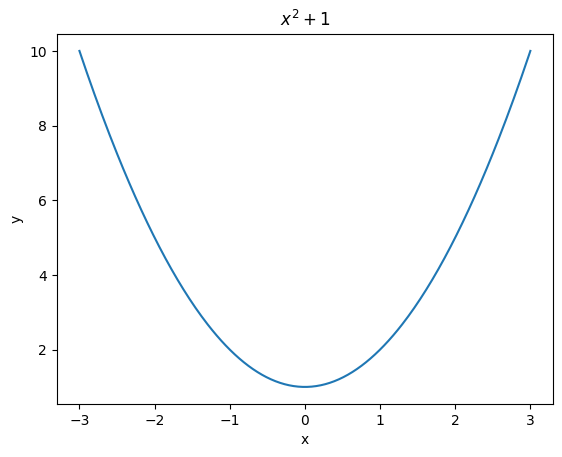

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-3, 3, 300)
plt.plot(x, x**2 + 1)
plt.title(r"$x^2 + 1$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


However, using SymPy, we can find numerical solutions for any polynomial. For example:

In [ ]:
from sympy import Eq, CRootOf, N, degree
from sympy.abc import x

equation = Eq(x**2 + 1, 0)
numerical_solution = [N(CRootOf(equation, d)) for d in range(degree(equation))]
print(numerical_solution)
# Prints: [-1.0*I, 1.0*I]

[-1.0*I, 1.0*I]


Notice that the solutions use $i$ (the imaginary unit), meaning they are complex numbers.
This is an illustration of the [Fundamental Theorem of Algebra](https://en.wikipedia.org/wiki/Fundamental_theorem_of_algebra), which states that every (non-constant) polynomial equation has at least one complex solution — even when no real solutions exist.

The takeaway: unless complex numbers are meaningful in your domain, you should ignore complex solutions.

---

To summarize polynomials:

- **Degree four and below:** There is always a closed-form solution involving basic arithmetic operations and roots.
- **Degree five and above:** Generally, no closed-form solution exists using elementary operations, though some do exist, and SymPy may occasionally find them.
- **Solutions:** Polynomials will always have solutions — at least numerically — but these solutions may not be real (both mathematically and practically). You should typically ignore them unless complex numbers are meaningful in your domain.

Next, we’ll add exponentials and logarithms to our equations. In the solutions, we discover the Lambert $W$ function. Is it a `CRootOf`-like cheat?

## Exp, Log and $x$

When we model data mathematically, we often use exponentials and logarithms. Below is a selection of what happens when we try to reverse such models by solving their equations with SymPy:

| Equation | SymPy Closed-Form (CF) Solution? | CF Solution(s) | A Numeric |
|----------|----------|----------|-------|
| $x e^{x} = 0$ | Yes, Elementary | $0$ | 0.0000 |
| $x e^{x} + \frac{1}{10} = 0$ | Yes, with LambertW | $\{ W\left(- \frac{1}{10}\right), W_{-1}\left(- \frac{1}{10}\right) \}$ | -0.1118 |
| $x + e^{x} = 0$ | Yes, with LambertW | $- W\left(1\right)$ | -0.5671 |
| $x \log{\left(x \right)} + 1 = 0$ | Yes, with LambertW | $e^{W\left(-1\right)}$ | 0.1684 + 0.7078i |
| $x + \log{\left(x \right)} = 0$ | Yes, with LambertW | $W\left(1\right)$ | 0.5671 |
| $x^{2} + \log{\left(x \right)} = 0$ | Yes, with LambertW | $e^{- \frac{W\left(2\right)}{2}}$ | 0.6529 |

Observations:

- **Sometimes you get lucky:** The first equation $x e^x = 0$ has an elementary solution: $x = 0$. While this isn’t always the case, simple closed-form solutions can sometimes be found, even in equations involving exponentials or logarithms.

- **Every equation in this “family” appears to be solvable**, with two caveats:
    First, I can’t precisely define this family and am unsure if a clear definition is possible.
    Second, solving these equations requires the Lambert $W$ function, such as $W(1)$ and $W_{-1}(1/10)$.
    This function arises when $x$ appears both inside and outside of an exponential or logarithmic expression.

- **If you don’t accept $W$, you can’t solve these functions in closed form:** Equations in this “family” generally have no closed-form *elementary* solutions without the Lambert $W$ function.

- **We should accept $W$:** The Lambert $W$ function is a well-defined, easily computable function with applications across math and science.
  Its late adoption relative to $\exp$, $\log$, $\sin$, and $\cos$ is simply historical.

- **A single $W$ can generate multiple solutions:** Similar to how the square root function can produce two solutions, a $W$ expression can yield zero, one, or two real solutions.
  When two real solutions exist, SymPy lists them separately, representing one as $W$ (the principal branch) and the other as $W_{-1}$ (the secondary branch).
  Beyond the real solutions, any $W$ expression also generates an infinite number of complex solutions.

- **Complex solutions will arise:** Some equations, such as $x \log(x) + 1 = 0$, lead only to complex solutions.
  As with polynomials, you should ignore complex numbers unless they are meaningful in your domain.

- **Degree-five and higher polynomials mixed with $\exp$ or $\log$ remain unsolvable:** Even with special functions like the Lambert $W$ function, these equations cannot be solved in closed form using elementary functions.

- **What happens if we use both an exponential and a logarithm in the same equation?** When both an exponential and a logarithm appear together, SymPy typically cannot find a closed form — not even with the Lambert $W$ function.

| Equation | SymPy Closed-Form (CF) Solution? | CF Solution(s) | A Numeric |
|----------|----------|----------|-------|
| $e^{x} \log{\left(x \right)} + 1 = 0$ | No, SymPy Limitation (NotImplementedError) |  | 0.5671 |
| $e^{x} + \log{\left(x \right)} = 0$ | No, SymPy Limitation (NotImplementedError) |  | 0.2699 |

---

To summarize, combining exponentials or logarithms with polynomials typically makes the equation unsolvable in elementary terms. If we allow the Lambert $W$ function, equations with exponentials or logarithms (but not both) often admit closed forms. When both appear together, I do not believe a closed form exists — though that is based on intuition rather than proof, and SymPy’s limitations alone do not settle the question.

We should embrace $W$ as a valid tool for handling such cases.

Next, let’s generalize Kepler’s problem and see what happens when we introduce trigonometric functions into our equations.

## Trigonometric Equations

**Simple Trigonometric Equations**: Here is our first batch of selected trigonometric equations:

| Equation | SymPy Closed-Form (CF) Solution? | CF Solution(s) | A Numeric |
|----------|----------|----------|-------|
| $\sin{\left(x \right)} + \cos{\left(x \right)} = 0$ | Yes, Elementary | $- \frac{\pi}{4}$ | -0.7854 |
| $\sin{\left(x \right)} \cos{\left(x \right)} + 1 = 0$ | Yes, Elementary | $\{{ - 2 \operatorname{atan}{\left(- \frac{1}{2} + \frac{\sqrt{2} \sqrt{1 - \sqrt{3} i}}{2} + \frac{\sqrt{3} i}{2} \right)}, \dots \}}$ | -0.7854 + -0.6585i |
| $\sin{\left(x \right)} + \sin{\left(x + 1 \right)} = 0$ | Yes, Elementary | $\{ 2 \operatorname{atan}{\left(\frac{1 - \sqrt{\tan^{2}{\left(\frac{1}{2} \right)} + 1}}{\tan{\left(\frac{1}{2} \right)}} \right)}, 2 \operatorname{atan}{\left(\frac{1 + \sqrt{\tan^{2}{\left(\frac{1}{2} \right)} + 1}}{\tan{\left(\frac{1}{2} \right)}} \right)} \}$ | -0.5000 |
| $\sin{\left(x \right)} \sin{\left(x + 1 \right)} + 1 = 0$ | Yes, Elementary | $\{{ - 2 \operatorname{atan}{\left(\frac{- \tan{\left(\frac{1}{2} \right)} + \sqrt{-1 + \tan^{4}{\left(\frac{1}{2} \right)} + 2 \tan^{2}{\left(\frac{1}{2} \right)} - 2 i \sqrt{\tan^{2}{\left(\frac{1}{2} \right)} + 2} \tan{\left(\frac{1}{2} \right)}} + i \sqrt{\tan^{2}{\left(\frac{1}{2} \right)} + 2}}{\tan^{2}{\left(\frac{1}{2} \right)} + 1} \right)}, \dots \}}$ | -0.5000 + -0.7921i |

SymPy successfully finds closed-form elementary solutions for each equation.
The solutions involve trigonometric functions, and in some cases, complex numbers appear.
(Again, we typically ignore the complex solutions unless they are meaningful for the problem at hand.)

Keep in mind that sine and cosine are periodic, which leads to infinitely many solutions. The closed-form solutions that SymPy provides typically represent a single cycle.

---

**Commensurate Frequency Equations**: In the preceding equations, we limited the trigonometric function’s input to $x + b$, where $b$ is a constant.
What happens if we allow inputs like $a_1 x + b_1$ and $a_2 x + b_2$ where both $a_1$ and $a_2$ are rational?
This means the two periodic functions may have different frequencies, but those frequencies can synchronize.
We say the trigonometric functions have **commensurate frequencies**.

| Equation | SymPy Closed-Form (CF) Solution? | CF Solution(s) | A Numeric |
|----------|----------|----------|-------|
| $\sin{\left(x \right)} + \sin{\left(3 x \right)} = 0$ | Yes, Elementary | $\{{ 0, - \frac{\pi}{2}, \frac{\pi}{2}, \pi, \dots \}}$ | 0.0000 |
| $\sin{\left(x \right)} + \sin{\left(3 x \right)} + 1 = 0$ | No, SymPy returns 0 Solutions |  | -0.2730 |
| $\sin{\left(x \right)} \sin{\left(3 x \right)} + 1 = 0$ | Yes, Elementary | $\{{ - \frac{\pi}{2}, \frac{\pi}{2}, i \log{\left(- \frac{1}{2} + \frac{\sqrt{5}}{2} \right)}, i \log{\left(\frac{1}{2} + \frac{\sqrt{5}}{2} \right)}, \dots \}}$ | -1.5708 |
| $\sin{\left(3 x \right)} + \sin{\left(x + 1 \right)} = 0$ | No, SymPy Limitation (Timeout) |  | 1.3208 |
| $\sin{\left(3 x \right)} \sin{\left(x + 1 \right)} + 1 = 0$ | No, SymPy Limitation (Timeout) |  | ValueError |

Observations:

- We occasionally get a closed-form elementary solution.
- For $\sin(x) + \sin(3x) + 1 = 0$, SymPy returns *zero solutions*.
  However, plots and numerical methods suggest solutions exist.
  Moreover, when [input into WolframAlpha](https://www.wolframalpha.com/input?i=sin%28x%29+%2B+sin%283x%29+%2B+1+%3D+0%2C+solve+for+x) (an online computer algebra system), it produces hybrid solutions:
  combinations of elementary functions with `CRootOf` expressions of degree six.
  As discussed in the polynomial section, such expressions generally lack a closed-form solution.
- SymPy sometimes times out looking for a closed-form solution even when numerical methods succeed.
- In other cases, it times out, and both numerical methods and plots confirm there are no solutions. (Previously, we might have received a complex-number result. WolframAlpha does sometimes return such [complex numeric results](https://www.wolframalpha.com/input?i=sin%283x%29+*+sin%28x+%2B+1%29+%2B1+%3D+0%2C+solve+for+x).)

Let’s plot the equation that returned zero closed-form solutions.
Let’s also plot the one that numerically returned `ValueError`:

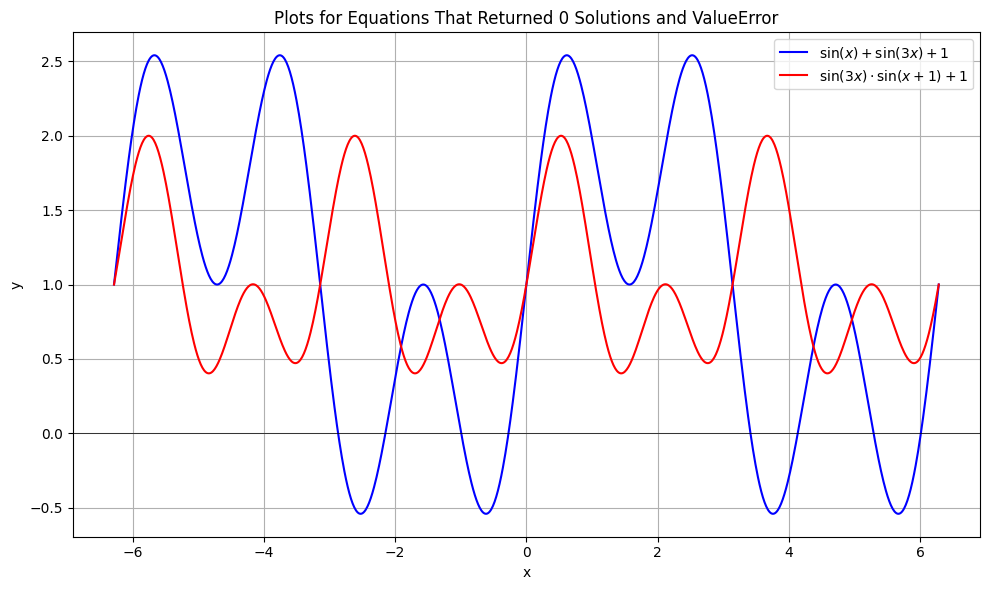

In [ ]:
x = sym.symbols('x')
f1 = sym.lambdify(x, sym.sin(x) + sym.sin(3*x) + 1, "numpy")
f2 = sym.lambdify(x, sym.sin(3*x)*sym.sin(x + 1) + 1, "numpy")
xv = np.linspace(-2*np.pi, 2*np.pi, 1000)
plt.figure(figsize=(10, 6))
plt.plot(xv, f1(xv), label=r'$\sin(x) + \sin(3x) + 1$', color='blue')
plt.plot(xv, f2(xv), label=r'$\sin(3x) \cdot \sin(x + 1) + 1$', color='red')
plt.axhline(0, color='black', lw=0.5)
plt.title("Plots for Equations That Returned 0 Solutions and ValueError")
plt.xlabel("x"), plt.ylabel("y"), plt.legend(), plt.grid(True), plt.tight_layout()
plt.show()

Additional Observations:

- From the **blue plot**, SymPy’s response of “no solutions” appears to be a **bug**.
  There are clearly solutions visible, and SymPy should either have found them or thrown an exception.
- On the other hand, in the **red plot**, the numerical result of `ValueError` is accurate — there are no solutions.

For all the trigonometric equations we’ve encountered so far, SymPy seems to find real-valued closed-form solutions when they exist. When they don’t exist, it times out or gives unpredictable errors.

**Non-Commensurate Frequency Equations**: In the preceding equations, we allowed trigonometric functions with inputs of the form $a x + b$, where $a$ is rational.
Now we ask: what if we allow inputs like $a_1 x + b_1$ and $a_2 x + b_2$ where $a_1$ is rational but $a_2$ is irrational?
This means the two periodic functions will never synchronize.
We say they have **non-commensurate frequencies**.

| Equation | SymPy Closed-Form (CF) Solution? | CF Solution(s) | A Numeric |
|----------|----------|----------|-------|
| $\sin{\left(x \right)} + \sin{\left(\sqrt{3} x \right)} = 0$ | Yes, Elementary | $\{ 0, - \frac{\pi \left(1 + \sqrt{3}\right)}{2} \}$ | 0.0000 |
| $\sin{\left(x \right)} + \sin{\left(\sqrt{3} x \right)} + 1 = 0$ | No, SymPy Limitation (NotImplementedError) |  | -0.3876 |
| $\sin{\left(\sqrt{3} x \right)} + \sin{\left(x + 1 \right)} = 0$ | No, SymPy Limitation (PolynomialDivisionFailed) |  | 1.9338 |
| $\sin{\left(x \right)} \sin{\left(\sqrt{3} x \right)} + 1 = 0$ | No, SymPy Limitation (NotImplementedError) |  | ValueError |
| $\sin{\left(\sqrt{3} x \right)} \sin{\left(x + 1 \right)} + 1 = 0$ | No, SymPy Limitation (NotImplementedError) |  | ValueError |

Observations:

- Equations with two trigonometric functions having non-commensurate frequencies generally seem **unsolvable** in closed form. When no elementary solution is available, SymPy returns `NotImplementedError`.
- We can still get lucky and occasionally find a closed-form solution.
  In one such case, SymPy returned `PolynomialDivisionFailed`, but [WolframAlpha found a closed-form expression](https://www.wolframalpha.com/input?i=sin%28sqrt%283%29*x%29+%2B+sin%28x%2B1%29%3D+0%2C+solve+for+x).
- When an equation has **no solutions**, SymPy produces a `ValueError`, which we can confirm via plots.
  In these cases, we did not see complex-number results.

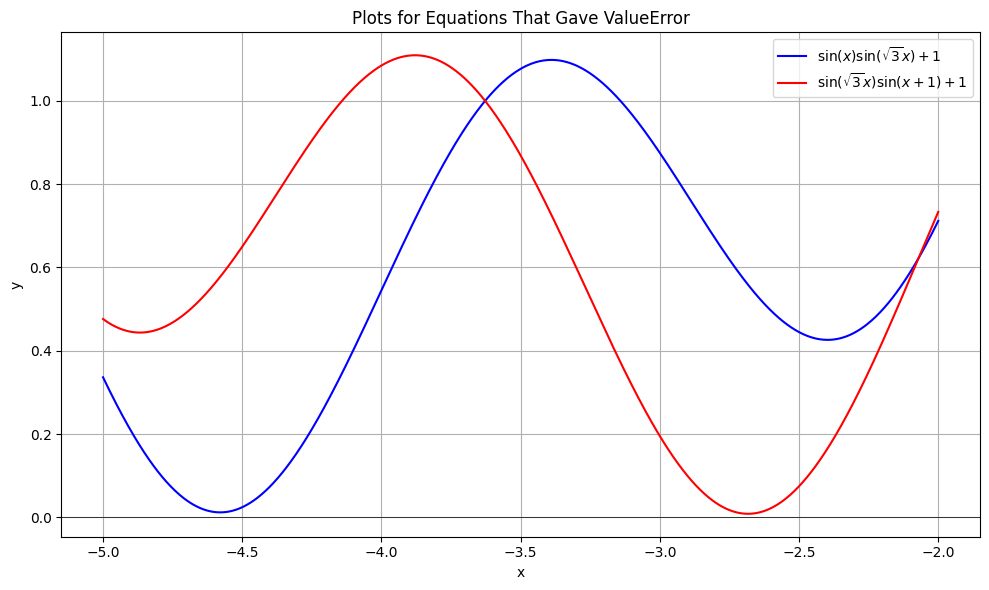

In [9]:
x = sym.symbols('x')
f1 = sym.lambdify(x, sym.sin(x)*sym.sin(sym.sqrt(3)*x) + 1, "numpy")
f2 = sym.lambdify(x, sym.sin(sym.sqrt(3)*x)*sym.sin(x + 1) + 1, "numpy")
xv = np.linspace(-5, -2, 1000)
plt.figure(figsize=(10, 6))
plt.plot(xv, f1(xv), label=r'$\sin(x)\sin(\sqrt{3}x)+1$', color='blue')
plt.plot(xv, f2(xv), label=r'$\sin(\sqrt{3}x)\sin(x+1)+1$', color='red')
plt.axhline(0, color='black', lw=0.5)
plt.title("Plots for Equations That Gave ValueError"), plt.xlabel("x"), plt.ylabel("y")
plt.legend(), plt.grid(True), plt.tight_layout()
plt.show()

*The equations do not quite touch zero, so no solutions*

Our conclusion regarding trigonometric equations is that we can often find elementary closed-form solutions.The main exception seems to be when the **frequencies are non-commensurate** — for example, in an equation containing $\sin(x)$ and $\sin(\sqrt{3} \, x)$.

The final question we’ll explore is what happens when we mix trigonometric functions with exponentials and logarithms.

## Trigonometric and $x$, $\exp$, $\log$

Our final set of selections will require only a short discussion. What if we run selected of equations through SymPy, each equation containing one trigonometric function combined with either $x$, $\exp(x)$, or $\log(x)$?

| Equation | SymPy Closed-Form (CF) Solution? | CF Solution(s) | A Numeric |
|----------|----------|----------|-------|
| $x + \sin{\left(x \right)} = 0$ | No, SymPy Limitation (NotImplementedError) |  | 0.0000 |
| $x \sin{\left(x \right)} + 1 = 0$ | No, SymPy Limitation (NotImplementedError) |  | 3.4368 |
| $\log{\left(x \right)} + \sin{\left(x \right)} = 0$ | No, SymPy Limitation (NotImplementedError) |  | 0.5787 |
| $e^{x} + \sin{\left(x \right)} = 0$ | No, SymPy Limitation (NotImplementedError) |  | -0.5885 |
| $x^{3} + \cos{\left(x \right)} = 0$ | No, SymPy Limitation (NotImplementedError) |  | -0.8655 |

The results are unanimous: SymPy is unable to produce closed-form solutions for any of these combinations. However, it seems that SymPy should have produced $x = 0$ as the closed-form solution for the first equation, as indeed [WolframAlpha does](https://www.wolframalpha.com).

## Conclusion

So, there you have it — an exploration of which equations tend to lack closed-form solutions. If you’re interested in experimenting with the examples in this article, you can find my [Python code on GitHub](https://github.com/CarlKCarlK/unsolvable).

Here is a summary of SymPy behaviors:

| Behavior                   | Meaning & Next Step                                                |
|-----------------------------|--------------------------------------------------------------------|
| `CRootOf` returned         | No closed form; use as-is or switch to numeric.                    |
| `NotImplementedError`      | Solver not coded; try another computer algebra system or numeric.                   |
| `PolynomialDivisionFailed` | Algebraic step broke; try another system or numeric.         |
| Timeout                    | Solver stuck; abandon analytic, use numeric or another system.     |
| 0 solutions (empty set)    | Either true or a solver miss; check elsewhere before concluding.   |
| Numeric `ValueError`       | Numeric solver failed; try new numeric guess. |

**Rule of thumb:**  
Only `CRootOf` is a final answer. All others are failures — switch to numeric or try another computer algebra system.

As I worked through these selected equations, here is what surprised me:

- **Kepler’s Equation** is wonderfully simple. I didn’t know one could model an ellipse — a geometric shape I find complicated — with such elegance.
- **Lambert’s W function** proved to be invaluable for handling equations that mix terms like $x$ and $\exp(x)$. We should consider it an elementary function.
- **SymPy** is an excellent, free tool that handles symbolic algebra and trigonometric equations far better than many of us could handle manually. While it may not match WolframAlpha in some cases, it’s incredibly versatile and accessible.
- **Mixing trigonometric functions** with other terms frequently prevents closed-form solutions, especially when frequencies are non-commensurate.
- **When closed-form solutions remain out of reach**, plotting and numerical methods step in, delivering practical results.

Thank you for joining me on this journey. I hope you now have a clearer understanding of when you can use equation-solving techniques to reverse models and how much SymPy can assist. Also, when an equation resists a closed-form solution, you can now understand why and when to rely on numerical methods.

> Aside: If you enjoyed exploring mathematics with Python and SymPy, you may also enjoy using them to explore **Newtonian physics**. Please see this [Towards Data Science article](https://medium.com/towards-data-science/perfect-infinite-precision-game-physics-in-python-part-1-698211c08d95) and the related, popular [PyData conference talk](https://www.youtube.com/watch?v=52n2qKgwW_Q).